In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 1️⃣ INSTALL DEPENDENCIES
print("⏳ Installing dependencies...")
!pip install -qU langchain-groq langchain-huggingface langchain-chroma langgraph langchain-community sentence-transformers unstructured chromadb gradio langchain-core

import os
import chromadb
from google.colab import userdata, drive
from langchain_groq import ChatGroq

# Setup Google Drive
drive.mount('/content/drive')
print("✅ Environment Ready.")

⏳ Installing dependencies...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 39.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.1/158.1 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.5/500.5 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 

In [3]:
# 2️⃣ CONFIGURATION
# Define where our data lives
SOURCE_DATA_DIR = "/content/drive/MyDrive/sampledata"
DRIVE_DB_PATH = "/content/drive/MyDrive/chroma_db"
EMBEDDING_MODEL = "all-mpnet-base-v2"

# Setup LLM (The Brain)
# We use OpenAI's open-source model (via Groq) for high-quality reasoning
os.environ["GROQ_API_KEY"] = userdata.get("GROQ_API_KEY")
llm = ChatGroq(model="openai/gpt-oss-120b", temperature=0.3)

print("✅ Environment Ready.")


✅ Environment Ready.


In [4]:
!pip install -q pypdf sentence-transformers langchain-community langchain-huggingface

In [5]:
from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings
import os

# 1. Setup paths and initialize the vector store structure
CLEAN_SOURCE_DIR = SOURCE_DATA_DIR
embeddings = HuggingFaceEmbeddings(model_name=EMBEDDING_MODEL)
vectorstore = Chroma(persist_directory=DRIVE_DB_PATH, embedding_function=embeddings)

print(f"📂 Loading PDFs from: {CLEAN_SOURCE_DIR}")

if not os.path.exists(CLEAN_SOURCE_DIR):
    print("❌ ERROR: The directory does not exist.")
else:
    # 2. Load PDFs RECURSIVELY (important for subfolders!)
    loader = PyPDFDirectoryLoader(CLEAN_SOURCE_DIR, recursive=True)
    documents = loader.load()

    if not documents:
        print("❌ No PDF documents were found. Check if the files are actually in that folder.")
    else:
        print(f"✅ Loaded {len(documents)} pages from PDFs.")

        # 3. Split text into manageable chunks
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
        chunks = text_splitter.split_documents(documents)
        print(f"✂️ Split into {len(chunks)} text chunks.")

        # 4. Add to Vector Store
        print("🧠 Embedding chunks into Chroma DB... (This may take a minute)")
        vectorstore.add_documents(chunks)

        # 5. Verify
        new_count = vectorstore._collection.count()
        print(f"🏁 Success! Total documents now in vector store: {new_count}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

📂 Loading PDFs from: /content/drive/MyDrive/sampledata
✅ Loaded 917 pages from PDFs.
✂️ Split into 1947 text chunks.
🧠 Embedding chunks into Chroma DB... (This may take a minute)
🏁 Success! Total documents now in vector store: 13629


In [6]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

# Factory function to build specialist agents
def create_specialist_chain(vectorstore, specialist_name, specialist_topic):

    # Custom prompt for each specialist [cite: 15]
    specialist_template = f"""You are the {specialist_name} for Denbighshire Council.
    Your expertise is strictly limited to {specialist_topic}.

    Use the context below to answer the employee's question.
    If the context doesn't contain the answer, state clearly that you cannot find it in the {specialist_topic} policy.

    Context:
    {{context}}

    Question:
    {{question}}
    """

    prompt = ChatPromptTemplate.from_template(specialist_template)

    # All agents share the vectorstore, but they have different instructions
    retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

    chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
    )
    return chain

# Create the 3 Specific RAG Agents
# Note: Ensure 'vectorstore' is already loaded from your previous cells!
leave_chain = create_specialist_chain(vectorstore, "Annual Leave Specialist", "Annual Leave, Sickness, and Time Off")
travel_chain = create_specialist_chain(vectorstore, "Travel & Subsistence Specialist", "Travel, Mileage, and Expenses")
pay_chain = create_specialist_chain(vectorstore, "Pay & Benefits Specialist", "Salaries, Honoraria, and Redundancy")

print("✅ Three Specialist RAG Agents (Leave, Travel, Pay) created.")

✅ Three Specialist RAG Agents (Leave, Travel, Pay) created.


In [7]:
import os
import pypdf

print(f"Checking PDF files recursively in: {SOURCE_DATA_DIR}")

# Recursively find all PDF files
pdf_files = []
for root, dirs, files in os.walk(SOURCE_DATA_DIR):
    for file in files:
        if file.lower().endswith('.pdf'):
            pdf_files.append(os.path.join(root, file))

if not pdf_files:
    print(f"❌ No PDF files found in {SOURCE_DATA_DIR} or its subfolders.")
else:
    print(f"Found {len(pdf_files)} PDF files. Checking for emptiness or corruption...")
    found_issue = False
    for pdf_file_path in pdf_files:
        pdf_file_name = os.path.basename(pdf_file_path)
        file_size = os.path.getsize(pdf_file_path)

        if file_size == 0:
            print(f"❌ ERROR: '{pdf_file_name}' is an empty file (0 bytes).")
            found_issue = True
            continue

        try:
            # Attempt to open and read the PDF to check for corruption
            with open(pdf_file_path, 'rb') as f:
                reader = pypdf.PdfReader(f)
                num_pages = len(reader.pages)
            print(f"✅ '{pdf_file_name}' seems valid with {num_pages} pages.")
        except Exception as e:
            print(f"❌ ERROR: Could not process '{pdf_file_name}'. Error: {e}")
            found_issue = True

    if not found_issue:
        print("\n✅ All PDF files in the directory and subfolders appear to be valid.")
    else:
        print("\n\u2b06\ufe0f Please review the errors above.")

Checking PDF files recursively in: /content/drive/MyDrive/sampledata
Found 47 PDF files. Checking for emptiness or corruption...
✅ 'policy-market-supplement-v2-1a.pdf' seems valid with 9 pages.
✅ 'pay-policy-2025-2026.pdf' seems valid with 18 pages.
✅ 'procedure-acting-up-honoraria-ex-gratia-payments.pdf' seems valid with 12 pages.
✅ 'standby-on-call-and-sleeping-in-arrangements-policy-v3-9.pdf' seems valid with 17 pages.
✅ 'travel-and-subsistence-v-2-2.pdf' seems valid with 14 pages.
✅ 'job-evaluation-appeals-procedure.pdf' seems valid with 11 pages.
✅ 'job-evaluation-maintenance-process-v2-1.pdf' seems valid with 11 pages.
✅ 'redeployment-policy-v2.pdf' seems valid with 26 pages.
✅ 'redundancy-policy-v3-3.pdf' seems valid with 24 pages.
✅ 'agency-workers-policy-v2-1.pdf' seems valid with 14 pages.
✅ 'equal-opportunities-in-employment-policy-v2.pdf' seems valid with 22 pages.
✅ 'fixed-term-contract-policy-v2-1.pdf' seems valid with 19 pages.
✅ 'disclosure-and-barring-services-dbs-v3a.

In [8]:
# Test Query
query = "How many days of annual leave am I entitled to?"

# Retrieve relevant docs
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})
retrieved_docs = retriever.invoke(query)

print(f"Query: {query}")
print("-" * 30)
for i, doc in enumerate(retrieved_docs):
    print(f"Result {i+1} (Source: {doc.metadata.get('source', 'Unknown')}):")
    print(doc.page_content[:200] + "...") # Show first 200 chars
    print("-" * 20)

Query: How many days of annual leave am I entitled to?
------------------------------
Result 1 (Source: /content/drive/MyDrive/DSAI/Module 5 Assignment - Team 3 Folders/Leave and attendance/annual-leave-guidance-for-managers-and-employees-v5-9-1.pdf):
Annual Leave Guide 
 
10 
the correct percentage. The items in underlined italic may be adjusted according to the 
employee’s contract. 
190 days + 5 additional training days 
+8 Bank Holidays* 
+21 d...
--------------------
Result 2 (Source: /content/drive/MyDrive/DSAI/Module 5 Assignment - Team 3 Folders/Leave and attendance/annual-leave-guidance-for-managers-and-employees-v5-9-1.pdf):
Annual Leave Guide 
 
10 
the correct percentage. The items in underlined italic may be adjusted according to the 
employee’s contract. 
190 days + 5 additional training days 
+8 Bank Holidays* 
+21 d...
--------------------
Result 3 (Source: /content/drive/MyDrive/DSAI/Module 5 Assignment - Team 3 Folders/Leave and attendance/annual-leave-guidance-for-ma

In [9]:
import os

print(f"Searching recursively in: {SOURCE_DATA_DIR}\n")

all_files = []
# os.walk 'walks' through every subfolder
for root, dirs, files in os.walk(SOURCE_DATA_DIR):
    for file in files:
        file_path = os.path.join(root, file)
        all_files.append(file_path)

# Filter by type
pdfs = [f for f in all_files if f.lower().endswith('.pdf')]
word_docs = [f for f in all_files if f.lower().endswith(('.doc', '.docx'))]
html_files = [f for f in all_files if f.lower().endswith(('.html', '.htm'))]

print(f"Total files found: {len(all_files)}")
print(f"📄 PDFs: {len(pdfs)}")
print(f"📝 Word Docs: {len(word_docs)}")
print(f"🌐 HTML: {len(html_files)}")

if len(pdfs) > 0:
    print("\nExample PDF path found:")
    print(pdfs[0])
else:
    print("\n⚠️ Still no PDFs found. Double check that the Google Drive is correctly mounted and the path is exact.")

Searching recursively in: /content/drive/MyDrive/sampledata

Total files found: 52
📄 PDFs: 47
📝 Word Docs: 3
🌐 HTML: 0

Example PDF path found:
/content/drive/MyDrive/sampledata/Pay and benefits/policy-market-supplement-v2-1a.pdf


In [10]:
doc_count = vectorstore._collection.count()
print(f"Total documents in vector store: {doc_count}")

if doc_count == 0:
    print("⚠️ Your vector store is empty. You need to ingest the PDF documents first.")

Total documents in vector store: 13629


In [11]:
# 1. Check if the database actually contains documents
doc_count = vectorstore._collection.count()
print(f"Total documents in vector store: {doc_count}")

# 2. Perform a raw similarity search to see 'behind the scenes'
query = "How is annual leave calculated for relief workers?"
print(f"\nRetrying raw search for: {query}")

# We'll try to find the top 5 most similar snippets
docs = vectorstore.similarity_search(query, k=5)

if not docs:
    print("❌ No documents were retrieved at all. This suggests the database is empty.")
else:
    print(f"✅ Retrieved {len(docs)} snippets. Displaying content snippets:\n")
    for i, doc in enumerate(docs):
        print(f"--- Snippet {i+1} ---")
        print(f"Source: {doc.metadata.get('source', 'Unknown')}")
        print(f"Content: {doc.page_content[:300]}...")
        print("\n")

Total documents in vector store: 13629

Retrying raw search for: How is annual leave calculated for relief workers?
✅ Retrieved 5 snippets. Displaying content snippets:

--- Snippet 1 ---
Source: /content/drive/MyDrive/DSAI/Module 5 Assignment - Team 3 Folders/Leave and attendance/annual-leave-guidance-for-managers-and-employees-v5-9-1.pdf
Content: leave. Therefore, relief workers must receive a pro rata amount of 34 days leave. 
The calculation used by Payroll for working out a relief workers monthly leave entitlement 
is as follows: 
260.71 days each year - 34 days leave = 226.71 
34days leave / 226.71 working days = 0.15 
0.15 x 100 = 15.00...


--- Snippet 2 ---
Source: /content/drive/MyDrive/DSAI/Module 5 Assignment - Team 3 Folders/Leave and attendance/annual-leave-guidance-for-managers-and-employees-v5-9-1.pdf
Content: leave. Therefore, relief workers must receive a pro rata amount of 34 days leave. 
The calculation used by Payroll for working out a relief workers monthly leave 

In [12]:
# Test Query
query = "How many days of annual leave am I entitled to?"

# Retrieve relevant docs
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})
retrieved_docs = retriever.invoke(query)

print(f"Query: {query}")
print("-" * 30)
for i, doc in enumerate(retrieved_docs):
    print(f"Result {i+1} (Source: {doc.metadata.get('source', 'Unknown')}):")
    print(doc.page_content[:200] + "...") # Show first 200 chars
    print("-" * 20)

Query: How many days of annual leave am I entitled to?
------------------------------
Result 1 (Source: /content/drive/MyDrive/DSAI/Module 5 Assignment - Team 3 Folders/Leave and attendance/annual-leave-guidance-for-managers-and-employees-v5-9-1.pdf):
Annual Leave Guide 
 
10 
the correct percentage. The items in underlined italic may be adjusted according to the 
employee’s contract. 
190 days + 5 additional training days 
+8 Bank Holidays* 
+21 d...
--------------------
Result 2 (Source: /content/drive/MyDrive/DSAI/Module 5 Assignment - Team 3 Folders/Leave and attendance/annual-leave-guidance-for-managers-and-employees-v5-9-1.pdf):
Annual Leave Guide 
 
10 
the correct percentage. The items in underlined italic may be adjusted according to the 
employee’s contract. 
190 days + 5 additional training days 
+8 Bank Holidays* 
+21 d...
--------------------
Result 3 (Source: /content/drive/MyDrive/DSAI/Module 5 Assignment - Team 3 Folders/Leave and attendance/annual-leave-guidance-for-ma

In [13]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

# --- 1. Setup the LLM ---
# Using the powerful Llama 3.3 model
llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0)

# --- 2. Define the Prompt Template ---
rag_prompt = ChatPromptTemplate.from_template("""
You are a specialist HR assistant for Denbighshire County Council.
Answer the question based ONLY on the following context from the official policy documents.
If the answer is not in the context, say "I cannot find that information in the official policy."

Context:
{context}

Question:
{question}
""")

# --- 3. Create the Chain ---
def create_rag_chain(vectorstore):
    # INCREASED to k=10 to read more pages and find the specific leave table
    retriever = vectorstore.as_retriever(search_kwargs={"k": 10})

    rag_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | rag_prompt
        | llm
        | StrOutputParser()
    )
    return rag_chain

# Initialize the chain with your database
rag_chain = create_rag_chain(vectorstore)

# --- TEST THE AGENT ---
print("Testing RAG Agent with k=10...")
# This test should now have a better chance of finding the general leave info
response = rag_chain.invoke("How many days of annual leave am I entitled to?")
print(response)

Testing RAG Agent with k=10...
According to the provided context, the basic annual leave entitlement is 21 days, but this may be dependent on service. There is a table that outlines the full-time equivalent entitlement based on reckonable service at the start of the leave year. 

For example, if you have:
- Up to 4 years 2 months of service, you are entitled to 33 days
- Up to 4 years 5 months of service, you are entitled to 34 days
- Up to 4 years 7 months of service, you are entitled to 35 days
- Up to 4 years 10 months of service, you are entitled to 36 days
- Up to 5 years of service, you are entitled to 37 days
- Over 5 years of service, you are entitled to 38 days

However, without knowing your specific service length, I cannot provide an exact number of days you are entitled to.


In [14]:
# 1. Install the search library
!pip install -q duckduckgo-search ddgs

# 2. Setup the Web Search Tool
from langchain_community.tools import DuckDuckGoSearchRun
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

wrapper = DuckDuckGoSearchAPIWrapper(region="uk-en", time="y") # Optimize for UK results
web_search_tool = DuckDuckGoSearchRun(api_wrapper=wrapper)

# --- TEST THE WEB TOOL ---
print("Testing Web Search...")
# We ask a question that IS NOT in your PDFs (like current jobs)
search_result = web_search_tool.invoke("Current job vacancies at Denbighshire County Council")
print(search_result[:500] + "...")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 77.8 MB/s eta 0:00:00


Testing Web Search...
At Denbighshire County Council , everyone has a role to play in making Denbighshire the best it can be. So, if you are a person who is thinks they can make a real difference to people lives, feels passionate in doing so and wants to do the best job possible then this is the place for you. Search for the latest Rhuddlan jobs on Careerjet, the employment search engine. Vacancy Information Greggs Team Members are the face and voice of our business, engaging with our customers and offering a fantast...


In [15]:
from typing import Literal
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate

# 1. Define the Router's Output Structure
# This forces the LLM to choose ONLY 'policy_query' or 'web_search'
class RouteQuery(BaseModel):
    """Route a user query to the most relevant datasource."""
    datasource: Literal["policy_query", "web_search"] = Field(
        ...,
        description="Given a user question, choose to route it to 'policy_query' (for internal rules/PDFs) or 'web_search' (for public info/jobs)."
    )

# 2. Setup the Router LLM
# We use the same smart Llama 3.3 model you just set up
structured_llm_router = llm.with_structured_output(RouteQuery)

# 3. Create the Routing Prompt
system_prompt = """You are an expert router for an HR Council Bot.
Your job is to route the user's question to the correct data source.

Use 'policy_query' for:
- Questions about Annual Leave, Holidays, Sickness.
- Questions about Travel, Mileage, Cars, Hotels.
- Questions about Pay, Salary, Honoraria, Redundancy.

Use 'web_search' for:
- Questions about CURRENT job openings or vacancies.
- Questions about latest news or press releases.
- Questions about specific contact details (phone numbers, emails) not in policy.

Return only the datasource choice.
"""

router_prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", "{question}"),
])

# Create the Router Chain
router = router_prompt | structured_llm_router

# --- TEST THE ROUTER ---
print("Testing Router Logic:\n")

q1 = "How many days of leave do I get?"
print(f"User: '{q1}'\n -> Router sent to: {router.invoke(q1).datasource}\n")

q2 = "Are there any IT jobs available right now?"
print(f"User: '{q2}'\n -> Router sent to: {router.invoke(q2).datasource}\n")

q3 = "Can I claim mileage for using my own car?"
print(f"User: '{q3}'\n -> Router sent to: {router.invoke(q3).datasource}\n")

Testing Router Logic:

User: 'How many days of leave do I get?'
 -> Router sent to: policy_query

User: 'Are there any IT jobs available right now?'
 -> Router sent to: web_search

User: 'Can I claim mileage for using my own car?'
 -> Router sent to: policy_query



In [16]:
from typing import Literal
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate

# 1. Define the Router's Output Structure
# This forces the LLM to choose ONLY 'policy_query' or 'web_search'
class RouteQuery(BaseModel):
    """Route a user query to the most relevant datasource."""
    datasource: Literal["policy_query", "web_search"] = Field(
        ...,
        description="Given a user question, choose to route it to 'policy_query' (for internal rules/PDFs) or 'web_search' (for public info/jobs)."
    )

# 2. Setup the Router LLM
# We use the same smart Llama 3.3 model you just set up
structured_llm_router = llm.with_structured_output(RouteQuery)

# 3. Create the Routing Prompt
system_prompt = """You are an expert router for an HR Council Bot.
Your job is to route the user's question to the correct data source.

Use 'policy_query' for:
- Questions about Annual Leave, Holidays, Sickness.
- Questions about Travel, Mileage, Cars, Hotels.
- Questions about Pay, Salary, Honoraria, Redundancy.

Use 'web_search' for:
- Questions about CURRENT job openings or vacancies.
- Questions about latest news or press releases.
- Questions about specific contact details (phone numbers, emails) not in policy.

Return only the datasource choice.
"""

router_prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", "{question}"),
])

# Create the Router Chain
router = router_prompt | structured_llm_router

# --- TEST THE ROUTER ---
print("Testing Router Logic:\n")

q1 = "How many days of leave do I get?"
print(f"User: '{q1}'\n -> Router sent to: {router.invoke(q1).datasource}\n")

q2 = "Are there any IT jobs available right now?"
print(f"User: '{q2}'\n -> Router sent to: {router.invoke(q2).datasource}\n")

q3 = "Can I claim mileage for using my own car?"
print(f"User: '{q3}'\n -> Router sent to: {router.invoke(q3).datasource}\n")

Testing Router Logic:

User: 'How many days of leave do I get?'
 -> Router sent to: policy_query

User: 'Are there any IT jobs available right now?'
 -> Router sent to: web_search

User: 'Can I claim mileage for using my own car?'
 -> Router sent to: policy_query



In [17]:
!pip install -q langgraph

In [18]:
import os
from typing import Literal, TypedDict
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langgraph.graph import StateGraph, END

# ==========================================
# 1. REDEFINE THE ROUTER (The Fix)
# ==========================================
class RouteQuery(BaseModel):
    """Route a user query to the most relevant specialist agent."""
    # We REMOVE 'policy_query' to force the new logic
    datasource: Literal["leave_logic", "travel_logic", "pay_logic", "web_search"] = Field(
        ...,
        description="Pick 'leave_logic' for holidays/sickness, 'travel_logic' for cars/hotels, 'pay_logic' for salary/grades, or 'web_search' for live jobs/news."
    )

system_prompt = """You are the Head Receptionist for Denbighshire County Council.
Your only job is to route the user's question to the correct specialist team.

ROUTING RULES:
1. 'leave_logic': Annual leave, holiday entitlement, carry-over, sickness, time off.
2. 'travel_logic': Car hire, mileage allowance, subsistence, hotels, train travel.
3. 'pay_logic': Salary, pay grades, honoraria, redundancy, overtime rates.
4. 'web_search': CURRENT job vacancies, recent news, specific phone numbers, or dynamic info not in policies.

Output the correct datasource ID only."""

route_prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", "{question}"),
])

# Ensure 'llm' is defined (Llama 3.3 or similar)
structured_llm_router = llm.with_structured_output(RouteQuery)
router = route_prompt | structured_llm_router
print("✅ Router logic successfully updated.")

# ==========================================
# 2. REDEFINE THE SPECIALIST AGENTS
# ==========================================
def create_specialist_chain(vectorstore, specialist_name, specialist_topic):
    specialist_template = f"""You are the {specialist_name} for Denbighshire Council.
    Your expertise is strictly limited to {specialist_topic}.

    Use the context below to answer the employee's question.
    If the context doesn't contain the answer, say "I cannot find that information in the {specialist_topic} policy."

    Context:
    {{context}}

    Question:
    {{question}}
    """
    prompt = ChatPromptTemplate.from_template(specialist_template)
    retriever = vectorstore.as_retriever(search_kwargs={"k": 5})
    chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
    )
    return chain

# Re-initialize agents with the CURRENT vectorstore
leave_chain = create_specialist_chain(vectorstore, "Annual Leave Specialist", "Annual Leave, Sickness, and Time Off")
travel_chain = create_specialist_chain(vectorstore, "Travel & Subsistence Specialist", "Travel, Mileage, and Expenses")
pay_chain = create_specialist_chain(vectorstore, "Pay & Benefits Specialist", "Salaries, Honoraria, and Redundancy")
print("✅ Specialist Agents successfully updated.")

# ==========================================
# 3. REBUILD THE GRAPH
# ==========================================
class AgentState(TypedDict):
    question: str
    answer: str

def run_web_search(state: AgentState):
    print("   --> Routing to Web Scout...")
    question = state["question"]
    enhanced_query = f"{question} site:denbighshire.gov.uk"
    results = web_search_tool.invoke(enhanced_query)
    return {"answer": results}

def run_leave_logic(state: AgentState):
    print("   --> Routing to Leave Specialist...")
    return {"answer": leave_chain.invoke(state["question"])}

def run_travel_logic(state: AgentState):
    print("   --> Routing to Travel Specialist...")
    return {"answer": travel_chain.invoke(state["question"])}

def run_pay_logic(state: AgentState):
    print("   --> Routing to Pay Specialist...")
    return {"answer": pay_chain.invoke(state["question"])}

def route_question(state: AgentState):
    print(f"📡 Router Receiving: {state['question']}")
    decision = router.invoke(state["question"])
    print(f"   --> Decision: {decision.datasource}")
    return decision.datasource

workflow = StateGraph(AgentState)

# Add Nodes
workflow.add_node("web_search", run_web_search)
workflow.add_node("leave_logic", run_leave_logic)
workflow.add_node("travel_logic", run_travel_logic)
workflow.add_node("pay_logic", run_pay_logic)

# Set Conditional Entry Point
workflow.set_conditional_entry_point(
    route_question,
    {
        "leave_logic": "leave_logic",
        "travel_logic": "travel_logic",
        "pay_logic": "pay_logic",
        "web_search": "web_search",
    }
)

# Connect to End
workflow.add_edge("web_search", END)
workflow.add_edge("leave_logic", END)
workflow.add_edge("travel_logic", END)
workflow.add_edge("pay_logic", END)

app = workflow.compile()
print("✅ System fully rebuilt. Ready for testing.")

✅ Router logic successfully updated.
✅ Specialist Agents successfully updated.
✅ System fully rebuilt. Ready for testing.


In [19]:
# The mandatory test prompts from the assignment [cite: 80-85]
test_questions = [
    "How many days of annual leave am I entitled to?",       # Should go to LEAVE
    "When am I required to use a hire car?",                # Should go to TRAVEL
    "How are honoraria payments calculated?",               # Should go to PAY
    "Are there any IT jobs available right now?"            # Should go to WEB
]

print("🚀 STARTING FINAL COMPLIANCE TEST...\n")

for q in test_questions:
    print(f"❓ User: {q}")
    result = app.invoke({"question": q})
    print(f"💡 Answer: {result['answer'][:250]}...") # Truncated for display
    print("-" * 50)

🚀 STARTING FINAL COMPLIANCE TEST...

❓ User: How many days of annual leave am I entitled to?
📡 Router Receiving: How many days of annual leave am I entitled to?
   --> Decision: leave_logic
   --> Routing to Leave Specialist...
💡 Answer: According to the Annual Leave Guidance, the basic annual leave entitlement is 21 days, but this may be dependent on your service....
--------------------------------------------------
❓ User: When am I required to use a hire car?
📡 Router Receiving: When am I required to use a hire car?
   --> Decision: travel_logic
   --> Routing to Travel Specialist...
💡 Answer: You are particularly required to use a hire car for car journeys in excess of 100 miles return. The normal expectation would be that the hire car would be in Group A or B category. For further information, please refer to the council's hire car polic...
--------------------------------------------------
❓ User: How are honoraria payments calculated?
📡 Router Receiving: How are honoraria payme

In [20]:
# The 3 Mandatory Test Questions from the Assignment PDF [cite: 80-85]
final_test_questions = [
    "How many days of annual leave am I entitled to?",
    "Are there any IT jobs available right now?",
    "When am I required to use a hire car?"
]

print("📝 GENERATING ASSIGNMENT DELIVERABLES...\n")

for q in final_test_questions:
    print("-" * 60)
    print(f"❓ User: {q}")

    # Run the system
    result = app.invoke({"question": q})

    print(f"💡 Answer: {result['answer']}")
    print("-" * 60 + "\n")

📝 GENERATING ASSIGNMENT DELIVERABLES...

------------------------------------------------------------
❓ User: How many days of annual leave am I entitled to?
📡 Router Receiving: How many days of annual leave am I entitled to?
   --> Decision: leave_logic
   --> Routing to Leave Specialist...
💡 Answer: According to the Annual Leave Guidance, the basic annual leave entitlement is 21 days, but this may be dependent on your service.
------------------------------------------------------------

------------------------------------------------------------
❓ User: Are there any IT jobs available right now?
📡 Router Receiving: Are there any IT jobs available right now?
   --> Decision: web_search
   --> Routing to Web Scout...
💡 Answer: " There 's a huge amount of potential in Rhyl and we ' re proud to be the team that will help give the next wave of entrepreneurs the supportive start they need. Its location is perfect, right next to the train and bus station, which will help anyone looking to

📸 GENERATING WORKFLOW DIAGRAM...


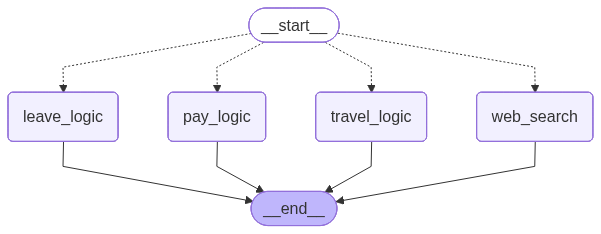

In [21]:
from IPython.display import Image, display

print("📸 GENERATING WORKFLOW DIAGRAM...")

try:
    # This generates a visual image of your bot
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # Fallback: Prints the text version if the image library isn't installed
    print("Could not generate image directly. Copy this text into https://mermaid.live :")
    print(app.get_graph().draw_mermaid())

In [ ]:
# 1. Install Gradio (The UI library)
!pip install -q gradio

import gradio as gr

# 2. Define the Chat Function
def chat_with_bot(message, history):
    print(f"User asked: {message}")
    # Run your LangGraph app
    result = app.invoke({"question": message})
    return result['answer']

# 3. Launch the App
# share=True creates a public link you can open on your phone!
demo = gr.ChatInterface(
    fn=chat_with_bot,
    title="Denbighshire Council HR Bot 🤖",
    description="Ask me about Annual Leave, Pay, Travel, or Current Jobs.",
    examples=["How many days of annual leave do I get?", "Are there any IT jobs?", "Can I claim mileage?"]
)

print("🚀 LAUNCHING UI... Click the public URL below!")
demo.launch(share=True, debug=True)

🚀 LAUNCHING UI... Click the public URL below!
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://08dc456574be27a3c9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


User asked: Can I claim mileage?
📡 Router Receiving: Can I claim mileage?
   --> Decision: travel_logic
   --> Routing to Travel Specialist...
